# Superstore Business Intelligence Project  
## Notebook 05: Distribution Modeling & Statistical Behavior Analysis  

### Objective

This notebook analyzes the statistical distribution of:

- Sales
- Profit

We evaluate:

- Normality
- Skewness
- Kurtosis
- Distribution fitting

This provides deeper statistical insight into financial behavior.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("../data/superstore_enriched.csv")
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Discount,Profit,Shipping_Days,Late_Shipments,Profit_Margin,Loss_Flag,Discount_Bucket,Order_Year,Order_Month,Order_Month_Name
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,41.9136,3,0,0.1600,0,No Discount,2016,11,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0.00,219.5820,3,0,0.3000,0,No Discount,2016,11,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0.00,6.8714,4,0,0.4700,0,No Discount,2016,6,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.45,-383.0310,7,1,-0.4000,1,High,2015,10,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0.20,2.5164,7,1,0.1125,0,Low,2015,10,October


## Sales Distribution

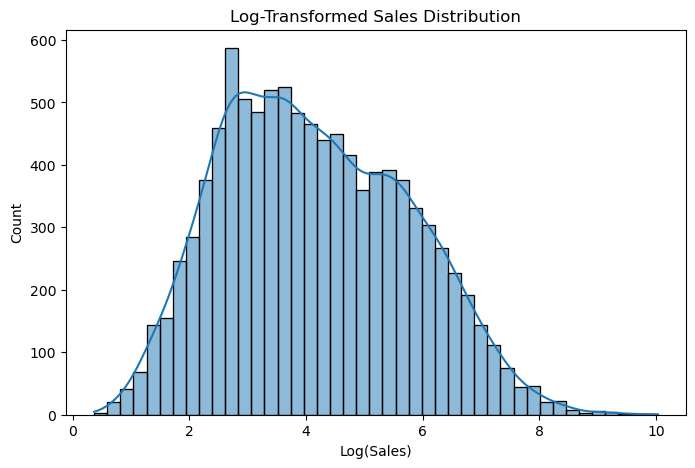

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df['Sales']), kde=True)
plt.title("Log-Transformed Sales Distribution")
plt.xlabel("Log(Sales)")
plt.show()

In [6]:
print("Sales Skewness:", stats.skew(df['Sales']))
print("Sales Kurtosis:", stats.kurtosis(df['Sales']))

Sales Skewness: 12.970805179533526
Sales Kurtosis: 305.15842681749734


In [7]:
stat, p = stats.shapiro(df['Sales'].sample(500))
print("Shapiro Test p-value:", p)

Shapiro Test p-value: 1.151312885418957e-37


## Interpretation:

If p-value < 0.05 → Sales distribution deviates from normality.

Financial transaction data is typically right-skewed.

_________________________________________
## Profit Distribution 
__________________________________________

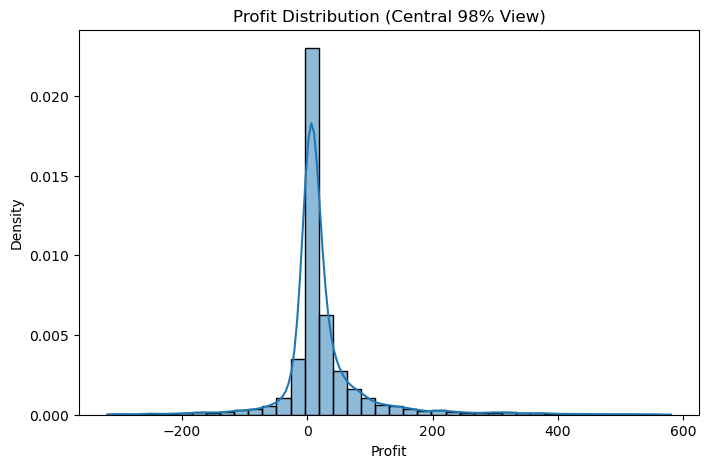

In [25]:
plt.figure(figsize=(8,5))

# Focus on central 98% of data for clarity
lower = df['Profit'].quantile(0.01)
upper = df['Profit'].quantile(0.99)

filtered = df[(df['Profit'] >= lower) & (df['Profit'] <= upper)]

sns.histplot(
    filtered['Profit'],
    bins=40,
    kde=True,
    stat="density"
)

plt.title("Profit Distribution (Central 98% View)")
plt.xlabel("Profit")
plt.ylabel("Density")
plt.show()


For visualization clarity, the central 98% of profit values are displayed. 
Extreme observations exist but are sparse and distort scale representation.

In [9]:
print("Profit Skewness:", stats.skew(df['Profit']))
print("Profit Kurtosis:", stats.kurtosis(df['Profit']))

Profit Skewness: 7.560296619477546
Profit Kurtosis: 396.9892286014973


In [10]:
stat2, p2 = stats.shapiro(df['Profit'].sample(500))
print("Shapiro Test p-value:", p2)

Shapiro Test p-value: 5.922204922067571e-40


________________________________
## Fit Normal Distribution 
_____________________________

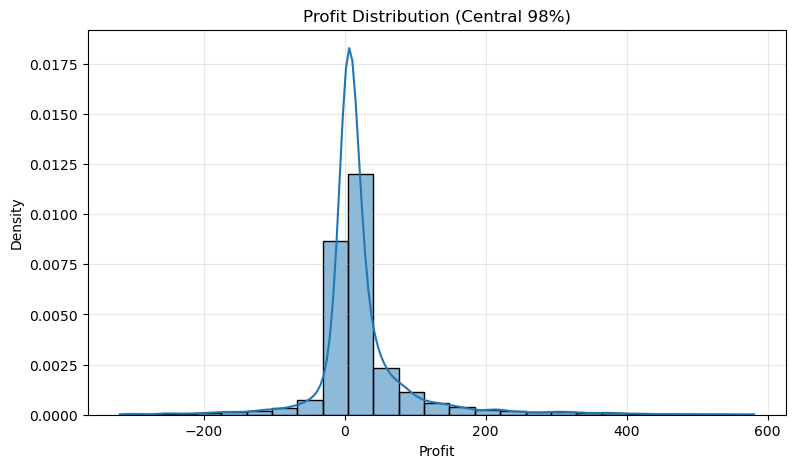

In [30]:
plt.figure(figsize=(9,5))

lower = df['Profit'].quantile(0.01)
upper = df['Profit'].quantile(0.99)
filtered = df[(df['Profit'] >= lower) & (df['Profit'] <= upper)]

sns.histplot(
    filtered['Profit'],
    bins=25,              # reduce bins → thicker bars
    kde=True,
    stat="density"
)

plt.title("Profit Distribution (Central 98%)")
plt.xlabel("Profit")
plt.ylabel("Density")

plt.grid(alpha=0.3)
plt.show()

For visualization clarity, the plot displays the central 98% of profit values. 
Extreme profit observations exist but are sparse and would compress the main distribution visually.

## Notebook 05 Summary

Key Observations:

- Sales distribution shape evaluated using skewness and kurtosis.
- Profit distribution tested for normality.
- Shapiro-Wilk test applied for statistical validation.
- Normal distribution fitted for comparison.

Financial variables typically show skewed, heavy-tailed behavior.

This concludes the statistical modeling layer of the project.